<a href="https://colab.research.google.com/github/subhash505/datat_analytics/blob/main/lab_data_analytics_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import sklearn

In [2]:
pip install --upgrade pandas-datareader

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 109 kB 5.3 MB/s 
  Attempting uninstall: pandas-datareader
    Found existing installation: pandas-datareader 0.9.0
    Uninstalling pandas-datareader-0.9.0:
      Successfully uninstalled pandas-datareader-0.9.0


In [3]:
from pandas_datareader import data as dr

Qii. Create portfolio for the given stocks:  'GLD', 'AMZN
       for the last 10 years.
2. Visualize the expected returns on the 10 years series.
3. Evaluate the annual daily mean, correlation,   Sharpe ratio and daily standard mean.
4. . Discuss on the optimal portfolio and the different parameters evaluated for the portfolio


In [4]:
stocks = ['GLD','AMZN']

In [6]:
sf = dr.DataReader(['GLD','AMZN'], 'yahoo', start='2012-01-01', end='2021-01-01')
sf.head()

Attributes   Adj Close               Close                High          \
Symbols            GLD    AMZN         GLD    AMZN         GLD    AMZN   
Date                                                                     
2012-01-03  155.919998  8.9515  155.919998  8.9515  156.300003  8.9740   
2012-01-04  156.710007  8.8755  156.710007  8.8755  157.380005  9.0250   
2012-01-05  157.779999  8.8805  157.779999  8.8805  158.029999  8.9125   
2012-01-06  157.199997  9.1305  157.199997  9.1305  158.630005  9.2325   
2012-01-09  156.500000  8.9280  156.500000  8.9280  157.589996  9.2185   

Attributes         Low                Open            Volume             
Symbols            GLD    AMZN         GLD    AMZN       GLD       AMZN  
Date                                                                     
2012-01-03  154.550003  8.7775  154.759995  8.7945  13385800  102216000  
2012-01-04  155.339996  8.8035  155.429993  8.9605  11549700   84104000  
2012-01-05  155.250000  8.7025  155.369995  8.7970  11621600   76182000  
2012-01-06  156.380005  8.8750  158.589996  8.9035   9790500  140168000  
2012-01-09  156.190002  8.8500  157.360001  9.1380   8771900  101138000

In [7]:
sf.tail()

Attributes   Adj Close                   Close                    High  \
Symbols            GLD        AMZN         GLD        AMZN         GLD   
Date                                                                     
2020-12-24  176.350006  158.634506  176.350006  158.634506  176.369995   
2020-12-28  175.710007  164.197998  175.710007  164.197998  177.910004   
2020-12-29  176.350006  166.100006  176.350006  166.100006  176.970001   
2020-12-30  177.699997  164.292496  177.699997  164.292496  177.720001   
2020-12-31  178.360001  162.846497  178.360001  162.846497  178.399994   

Attributes                     Low                    Open              \
Symbols           AMZN         GLD        AMZN         GLD        AMZN   
Date                                                                     
2020-12-24  160.100006  175.509995  158.449997  175.550003  159.695007   
2020-12-28  165.199997  175.630005  158.634506  177.259995  159.699997   
2020-12-29  167.532501  175.570007  164.061005  176.250000  165.496994   
2020-12-30  167.104996  176.440002  164.123505  176.440002  167.050003   
2020-12-31  164.145996  177.320007  162.059998  178.070007  163.750000   

Attributes   Volume             
Symbols         GLD       AMZN  
Date                            
2020-12-24  3695400   29038000  
2020-12-28  7778700  113736000  
2020-12-29  5983700   97458000  
2020-12-30  5914000   64186000  
2020-12-31  7540800   59144000

In [8]:
# Yearly returns for individual companies
return1 = sf.resample('Y').last().pct_change().mean()
return1

Attributes  Symbols
Adj Close   GLD        0.025479
            AMZN       0.436483
Close       GLD        0.025479
            AMZN       0.436483
High        GLD        0.024882
            AMZN       0.436930
Low         GLD        0.025819
            AMZN       0.441482
Open        GLD        0.026443
            AMZN       0.443157
Volume      GLD        0.064287
            AMZN       0.165138
dtype: float64

2. Visualize the expected returns on the 10 years series.

In [9]:
stock_data = pd.DataFrame()
for s in stocks:
    stock_data[s] = dr.DataReader(s, data_source = 'yahoo', start = '2012-07-25',end='2022-07-25')['Adj Close']

In [10]:
stock_data.head()

,GLD,AMZN
Date,,
2012-07-25,155.669998,10.8525
2012-07-26,156.770004,11.0005
2012-07-27,157.539993,11.8660
2012-07-30,157.429993,11.8045
2012-07-31,156.490005,11.6650


In [11]:
stock_data.tail()

,GLD,AMZN
Date,,
2022-07-19,159.539993,118.209999
2022-07-20,158.039993,122.769997
2022-07-21,160.270004,124.629997
2022-07-22,160.669998,122.419998
2022-07-25,160.229996,121.139999


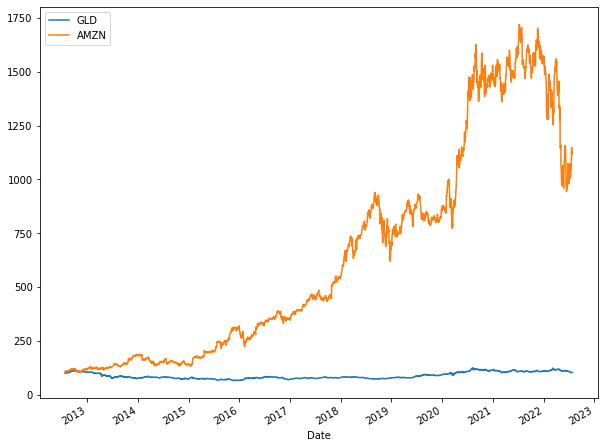

In [12]:
(stock_data/stock_data.iloc[0] * 100).plot(figsize = (10,8))

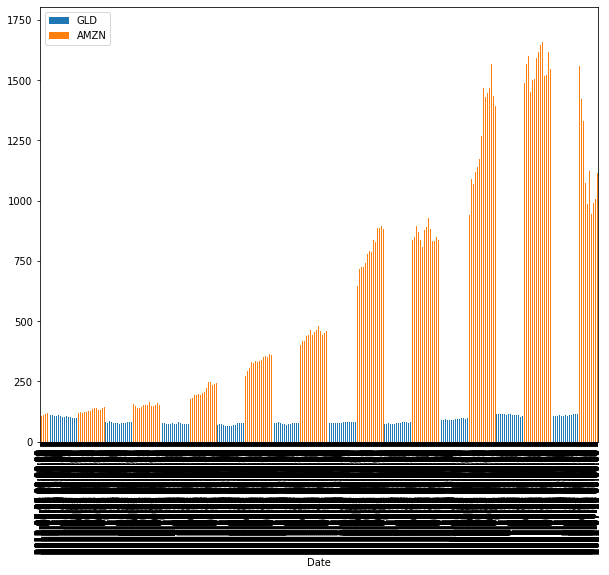

In [13]:
(stock_data/stock_data.iloc[0] * 100).plot.bar(figsize = (10,8))

# 3. Evaluate the annual daily mean, correlation,   Sharpe ratio and daily standard mean.

In [14]:
logReturns = np.log(stock_data/stock_data.shift(1))
logReturns

,GLD,AMZN
Date,,
2012-07-25,NaN,NaN
2012-07-26,0.007041,0.013545
2012-07-27,0.004900,0.075736
2012-07-30,-0.000698,-0.005196
2012-07-31,-0.005989,-0.011888
...,...,...
2022-07-19,0.002385,0.038372
2022-07-20,-0.009447,0.037850
2022-07-21,0.014012,0.015037


In [15]:
#To obtain annual average returns!
logReturns.mean() * 250 

GLD     0.002870
AMZN    0.239816
dtype: float64

In [16]:
#To obtain annual covariance between PG and Microsoft
logReturns.cov() * 250 

,GLD,AMZN
GLD,0.022236,-0.000418
AMZN,-0.000418,0.098338


In [17]:
stock_data.corr()

,GLD,AMZN
GLD,1.000000,0.691277
AMZN,0.691277,1.000000


In [18]:
# Dynamically generating weights code
numberOfStocks = len(stocks)
numberOfStocks

2

In [21]:
import random
  
random.seed(10)

In [22]:
weights = np.random.random(numberOfStocks)
weights = weights/np.sum(weights)

In [23]:
weights = weights/np.sum(weights)#rebalance
weights

array([0.64442961, 0.35557039])

In [24]:
(weights * logReturns.mean())* 250

GLD     0.001849
AMZN    0.085272
dtype: float64

In [26]:
expectedReturn = []
standardDeviation = []
weightList0 = []
weightList1 = []
np.random.seed(10)
# Running simulations for finding optimum weights
for i in range(100):
    weights = np.random.random(numberOfStocks)
    weights = weights/ weights.sum()
    weightList0.append(weights[0])
    weightList1.append(weights[1])
    expectedReturn.append((weights * logReturns.mean()).sum() * 250)
    standardDeviation.append(np.sqrt(np.dot(weights.T, np.dot(logReturns.cov() * 250, weights))))

#Converting lists into arrays
weightList0 = np.array(weightList0) #Weights for PG
weightList1 = np.array(weightList1) #Weights for MSFT
expectedReturn = np.array(expectedReturn) 
standardDeviation = np.array(standardDeviation)

#Creating dataframe
df = pd.DataFrame({"Weight of Gold": weightList0, "Weight of Amazon": weightList1, "Expected Return": expectedReturn, "Standard deviation": standardDeviation})
df.head()

,Weight of Gold,Weight of Amazon,Expected Return,Standard deviation
0,0.973800,0.026200,0.009078,0.145369
1,0.458351,0.541649,0.131212,0.182523
2,0.689208,0.310792,0.076511,0.141002
3,0.206618,0.793382,0.190859,0.250423
4,0.656867,0.343133,0.084174,0.144859


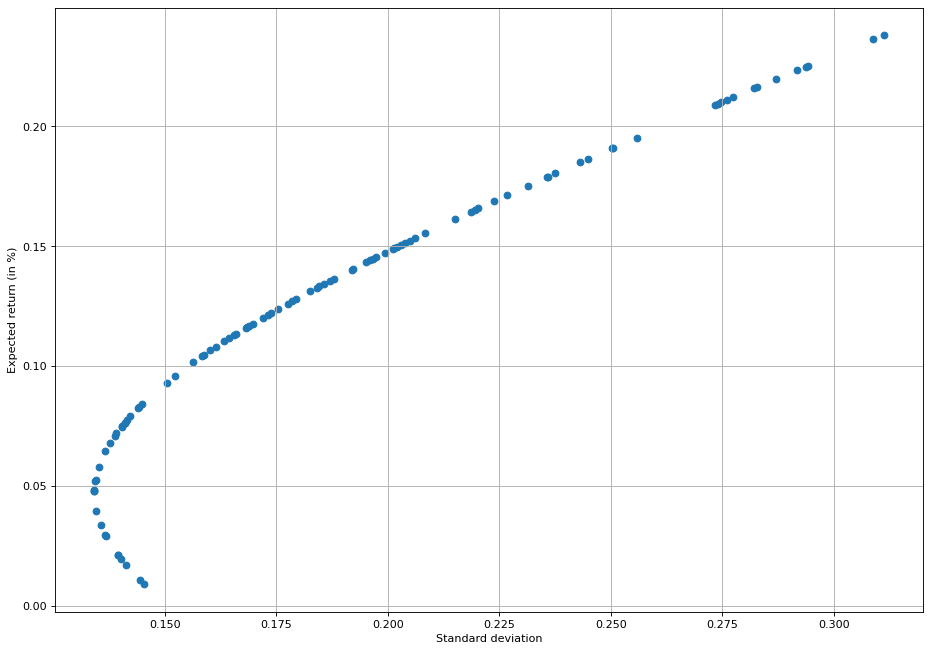

In [27]:
plt.figure(figsize=(14, 10), dpi=80)
plt.grid()
plt.scatter(df["Standard deviation"], df["Expected Return"])
plt.xlabel("Standard deviation")
plt.ylabel("Expected return (in %)")
plt.show()

# Sharpe ratio 

In [28]:
stock_data['Total Pos']=stock_data.sum(axis=1)

In [29]:
stock_data.head()

,GLD,AMZN,Total Pos
Date,,,
2012-07-25,155.669998,10.8525,166.522498
2012-07-26,156.770004,11.0005,167.770504
2012-07-27,157.539993,11.8660,169.405993
2012-07-30,157.429993,11.8045,169.234492
2012-07-31,156.490005,11.6650,168.155005


In [30]:
stock_data.tail()

,GLD,AMZN,Total Pos
Date,,,
2022-07-19,159.539993,118.209999,277.749992
2022-07-20,158.039993,122.769997,280.809990
2022-07-21,160.270004,124.629997,284.900002
2022-07-22,160.669998,122.419998,283.089996
2022-07-25,160.229996,121.139999,281.369995


Text(0.5, 1.0, 'Total Portfolio Value')

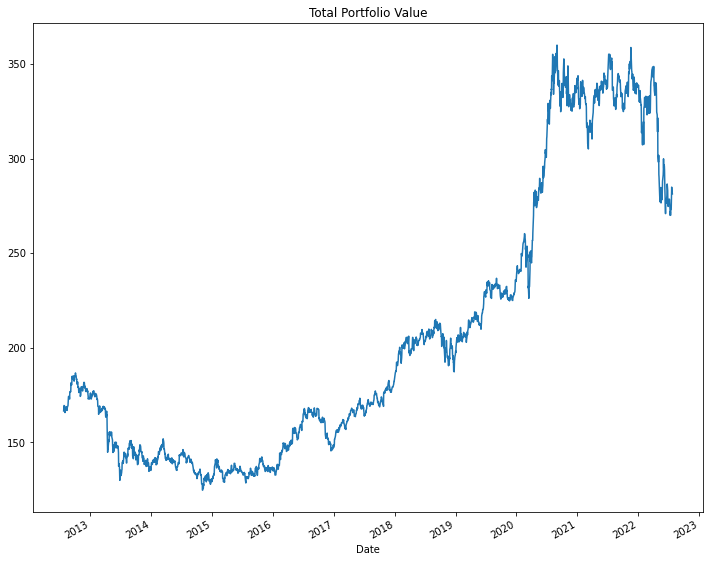

In [31]:
stock_data['Total Pos'].plot(figsize=(12,10))
plt.title('Total Portfolio Value')

In [32]:
stock_data['Total Pos'].pct_change(1)

Date
2012-07-25         NaN
2012-07-26    0.007495
2012-07-27    0.009748
2012-07-30   -0.001012
2012-07-31   -0.006379
                ...   
2022-07-19    0.017697
2022-07-20    0.011017
2022-07-21    0.014565
2022-07-22   -0.006353
2022-07-25   -0.006076
Name: Total Pos, Length: 2516, dtype: float64

In [33]:
stock_data['Daily Returns']=stock_data['Total Pos'].pct_change(1)
stock_data

,GLD,AMZN,Total Pos,Daily Returns
Date,,,,
2012-07-25,155.669998,10.852500,166.522498,NaN
2012-07-26,156.770004,11.000500,167.770504,0.007495
2012-07-27,157.539993,11.866000,169.405993,0.009748
2012-07-30,157.429993,11.804500,169.234492,-0.001012
2012-07-31,156.490005,11.665000,168.155005,-0.006379
...,...,...,...,...
2022-07-19,159.539993,118.209999,277.749992,0.017697
2022-07-20,158.039993,122.769997,280.809990,0.011017
2022-07-21,160.270004,124.629997,284.900002,0.014565


In [34]:
#### Average Daily Return
stock_data['Daily Returns'].mean()

0.00025595293836534364

In [35]:
##Standard Daily Return
stock_data['Daily Returns'].std()

0.0097237246823802

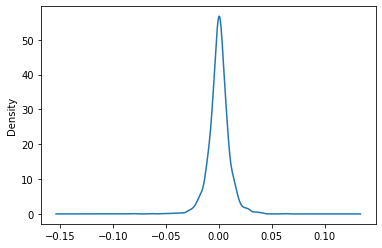

In [36]:
stock_data['Daily Returns'].plot(kind='kde')

In [37]:
Sharperatio=stock_data['Daily Returns'].mean()/stock_data['Daily Returns'].std()
Sharperatio

0.026322520096557358

In [38]:
ASR=(252**0.5)*Sharperatio
ASR

0.417857052335944

In [39]:
stock_data['GLD'].to_csv('Gold_CLOSE')
stock_data['AMZN'].to_csv('AMZN_CLOSE')

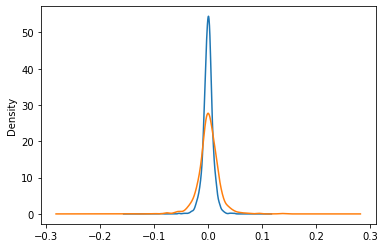

In [40]:
stock_data['GLD'].pct_change(1).plot(kind='kde')
stock_data['AMZN'].pct_change(1).plot(kind='kde')

# #  4. . Discuss on the optimal portfolio and the different parameters evaluated for the portfolio

In [41]:
df[df['Standard deviation']==df['Standard deviation'].max()]

,Weight of Gold,Weight of Amazon,Expected Return,Standard deviation
6,0.00765,0.99235,0.238004,0.311182


In [42]:
df[df['Standard deviation']==df['Standard deviation'].min()]

,Weight of Gold,Weight of Amazon,Expected Return,Standard deviation
88,0.809994,0.190006,0.047891,0.134202


In [53]:
#for the interval of limited risk
df[(df["Expected Return"]>0.09) & (df["Expected Return"]< 0.15)].sort_values(by=['Expected Return'])

,Weight of Gold,Weight of Amazon,Expected Return,Standard deviation
45,0.618718,0.381282,0.093213,0.150369
15,0.606859,0.393141,0.096023,0.152278
84,0.583214,0.416786,0.101626,0.156340
82,0.572022,0.427978,0.104278,0.158376
7,0.570201,0.429799,0.104709,0.158714
9,0.562241,0.437759,0.106595,0.160212
43,0.555937,0.444063,0.108089,0.161423
13,0.546259,0.453741,0.110382,0.163321
40,0.541156,0.458844,0.111591,0.164341
38,0.535503,0.464497,0.112931,0.165486


In [46]:
#for the higher risk
df[(df["Expected Return"]>0.22)].sort_values(by=['Expected Return']).head(10)

,Weight of Gold,Weight of Amazon,Expected Return,Standard deviation
19,0.069664,0.930336,0.223310,0.291836
81,0.063426,0.936574,0.224788,0.293767
46,0.061598,0.938402,0.225221,0.294334
69,0.014968,0.985032,0.236270,0.308884
6,0.007650,0.992350,0.238004,0.311182


In [47]:
df["Expected Return"].mean()

0.12554320013031067

In [48]:
df["Expected Return"].sort_values().median()

0.1276028710989684

In [54]:
df[(df["Expected Return"]>0.127)].sort_values(by=['Expected Return'])

,Weight of Gold,Weight of Amazon,Expected Return,Standard deviation
31,0.475264,0.524736,0.127204,0.178581
89,0.471899,0.528101,0.128002,0.179357
1,0.458351,0.541649,0.131212,0.182523
72,0.451798,0.548202,0.132764,0.184078
98,0.449345,0.550655,0.133346,0.184664
63,0.445102,0.554898,0.134351,0.185683
62,0.439857,0.560143,0.135594,0.186951
86,0.435741,0.564259,0.136569,0.187952
70,0.419867,0.580133,0.140330,0.191865
5,0.418220,0.581780,0.140721,0.192276


In [51]:
# for Greater Return of investment
df.loc[6]

Weight of Gold        0.007650
Weight of Amazon      0.992350
Expected Return       0.238004
Standard deviation    0.311182
Name: 6, dtype: float64